In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [4]:
# Cell 2: Load and Prepare Data
def load_stock_data(file_paths):
    """
    Load multiple CSV files and prepare data for analysis
    """
    data_frames = {}
    
    for i, file_path in enumerate(file_paths):
        try:
            df = pd.read_csv(file_path)
            df.columns = df.columns.str.strip()
            
            # Convert Date to datetime and set as index
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)
            
            # Ensure numeric columns
            numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            
            data_frames[f'stock_{i+1}'] = df
            print(f"✅ Loaded {file_path} - Shape: {df.shape}")
            
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")
    
    return data_frames

# Load your data
file_paths = [
    '../data/AAPL.csv',
    '../data/AMZN.csv', 
    '../data/GOOG.csv',
    '../data/META.csv',
    '../data/MSFT.csv',
    '../data/NVDA.csv'
]

stock_data = load_stock_data(file_paths)

✅ Loaded ../data/AAPL.csv - Shape: (3774, 5)
✅ Loaded ../data/AMZN.csv - Shape: (3774, 5)
✅ Loaded ../data/GOOG.csv - Shape: (3774, 5)
✅ Loaded ../data/META.csv - Shape: (2923, 5)
✅ Loaded ../data/MSFT.csv - Shape: (3774, 5)
✅ Loaded ../data/NVDA.csv - Shape: (3774, 5)


In [5]:
# Cell 3: Display Sample Data
print("📊 Sample data from first stock:")
display(stock_data['stock_1'].head())

print("\n📈 Basic statistics:")
display(stock_data['stock_1'].describe())

📊 Sample data from first stock:


,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800



📈 Basic statistics:


,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,53.841169,54.383801,53.247465,53.801628,2.640640e+08
std,55.064042,55.627235,54.440128,55.009182,2.345629e+08
min,2.345299,2.459265,2.345299,2.380989,2.404830e+07
25%,15.050355,15.183043,14.901886,15.007580,9.581845e+07
50%,26.975808,27.168844,26.836844,27.010205,1.667348e+08
75%,74.664204,75.252383,73.553555,74.127927,3.777410e+08
max,196.256592,197.752460,195.156944,196.167437,1.880998e+09


In [6]:
# Cell 4: Calculate Technical Indicators with TA-Lib
def calculate_indicators(df):
    """
    Calculate comprehensive technical indicators
    """
    df_analysis = df.copy()
    
    # Extract price arrays for TA-Lib
    high = df_analysis['High'].values
    low = df_analysis['Low'].values
    close = df_analysis['Close'].values
    volume = df_analysis['Volume'].values
    
    # 🎯 TREND INDICATORS
    df_analysis['SMA_20'] = talib.SMA(close, timeperiod=20)
    df_analysis['SMA_50'] = talib.SMA(close, timeperiod=50)
    df_analysis['EMA_12'] = talib.EMA(close, timeperiod=12)
    df_analysis['EMA_26'] = talib.EMA(close, timeperiod=26)
    
    # 📊 MOMENTUM INDICATORS
    df_analysis['RSI_14'] = talib.RSI(close, timeperiod=14)
    
    # MACD
    macd, macd_signal, macd_hist = talib.MACD(close)
    df_analysis['MACD'] = macd
    df_analysis['MACD_Signal'] = macd_signal
    df_analysis['MACD_Histogram'] = macd_hist
    
    # Stochastic
    slowk, slowd = talib.STOCH(high, low, close)
    df_analysis['Stoch_K'] = slowk
    df_analysis['Stoch_D'] = slowd
    
    # 🌊 VOLATILITY INDICATORS
    # Bollinger Bands
    bb_upper, bb_middle, bb_lower = talib.BBANDS(close, timeperiod=20)
    df_analysis['BB_Upper'] = bb_upper
    df_analysis['BB_Middle'] = bb_middle
    df_analysis['BB_Lower'] = bb_lower
    
    # ATR
    df_analysis['ATR_14'] = talib.ATR(high, low, close, timeperiod=14)
    
    return df_analysis

# Apply to first stock (you can loop through all)
primary_stock = stock_data['stock_1']
analyzed_data = calculate_indicators(primary_stock)

print("✅ Technical indicators calculated!")
display(analyzed_data[['Close', 'SMA_20', 'RSI_14', 'MACD']].tail())

✅ Technical indicators calculated!


,Close,SMA_20,RSI_14,MACD
Date,,,,
2023-12-22,191.788757,191.856618,54.672784,2.633141
2023-12-26,191.243912,192.018094,53.090049,2.304751
2023-12-27,191.342972,192.154308,53.354446,2.029104
2023-12-28,191.768951,192.362839,54.540999,1.823998
2023-12-29,190.728775,192.490633,51.121347,1.559539


In [7]:
# Cell 5: PyNance-style Financial Metrics
def calculate_financial_metrics(df):
    """
    Calculate PyNance-style financial metrics
    """
    df_metrics = df.copy()
    
    # Returns analysis
    df_metrics['Daily_Return'] = df_metrics['Close'].pct_change()
    df_metrics['Cumulative_Return'] = (1 + df_metrics['Daily_Return']).cumprod()
    
    # Volatility
    df_metrics['Volatility_20D'] = df_metrics['Daily_Return'].rolling(window=20).std()
    
    # Price analysis
    df_metrics['Price_Change'] = df_metrics['Close'].diff()
    df_metrics['Gap'] = df_metrics['Open'] - df_metrics['Close'].shift(1)
    
    # Support and Resistance
    df_metrics['Resistance_20'] = df_metrics['High'].rolling(window=20).max()
    df_metrics['Support_20'] = df_metrics['Low'].rolling(window=20).min()
    
    return df_metrics

analyzed_data = calculate_financial_metrics(analyzed_data)
print("✅ Financial metrics calculated!")

✅ Financial metrics calculated!


In [8]:
# Cell 6: Trading Signals
def generate_trading_signals(df):
    """
    Generate trading signals based on multiple indicators
    """
    df_signals = df.copy()
    
    # RSI Signals
    df_signals['RSI_Signal'] = 0
    df_signals.loc[df_signals['RSI_14'] < 30, 'RSI_Signal'] = 1  # Oversold - Buy
    df_signals.loc[df_signals['RSI_14'] > 70, 'RSI_Signal'] = -1  # Overbought - Sell
    
    # Moving Average Crossover
    df_signals['MA_Signal'] = 0
    df_signals.loc[df_signals['SMA_20'] > df_signals['SMA_50'], 'MA_Signal'] = 1
    df_signals.loc[df_signals['SMA_20'] < df_signals['SMA_50'], 'MA_Signal'] = -1
    
    # MACD Signals
    df_signals['MACD_Signal_Cross'] = 0
    df_signals.loc[df_signals['MACD'] > df_signals['MACD_Signal'], 'MACD_Signal_Cross'] = 1
    df_signals.loc[df_signals['MACD'] < df_signals['MACD_Signal'], 'MACD_Signal_Cross'] = -1
    
    # Combined Signal
    df_signals['Combined_Signal'] = (
        df_signals['RSI_Signal'] + 
        df_signals['MA_Signal'] + 
        df_signals['MACD_Signal_Cross']
    )
    
    return df_signals

analyzed_data = generate_trading_signals(analyzed_data)
print("✅ Trading signals generated!")

✅ Trading signals generated!


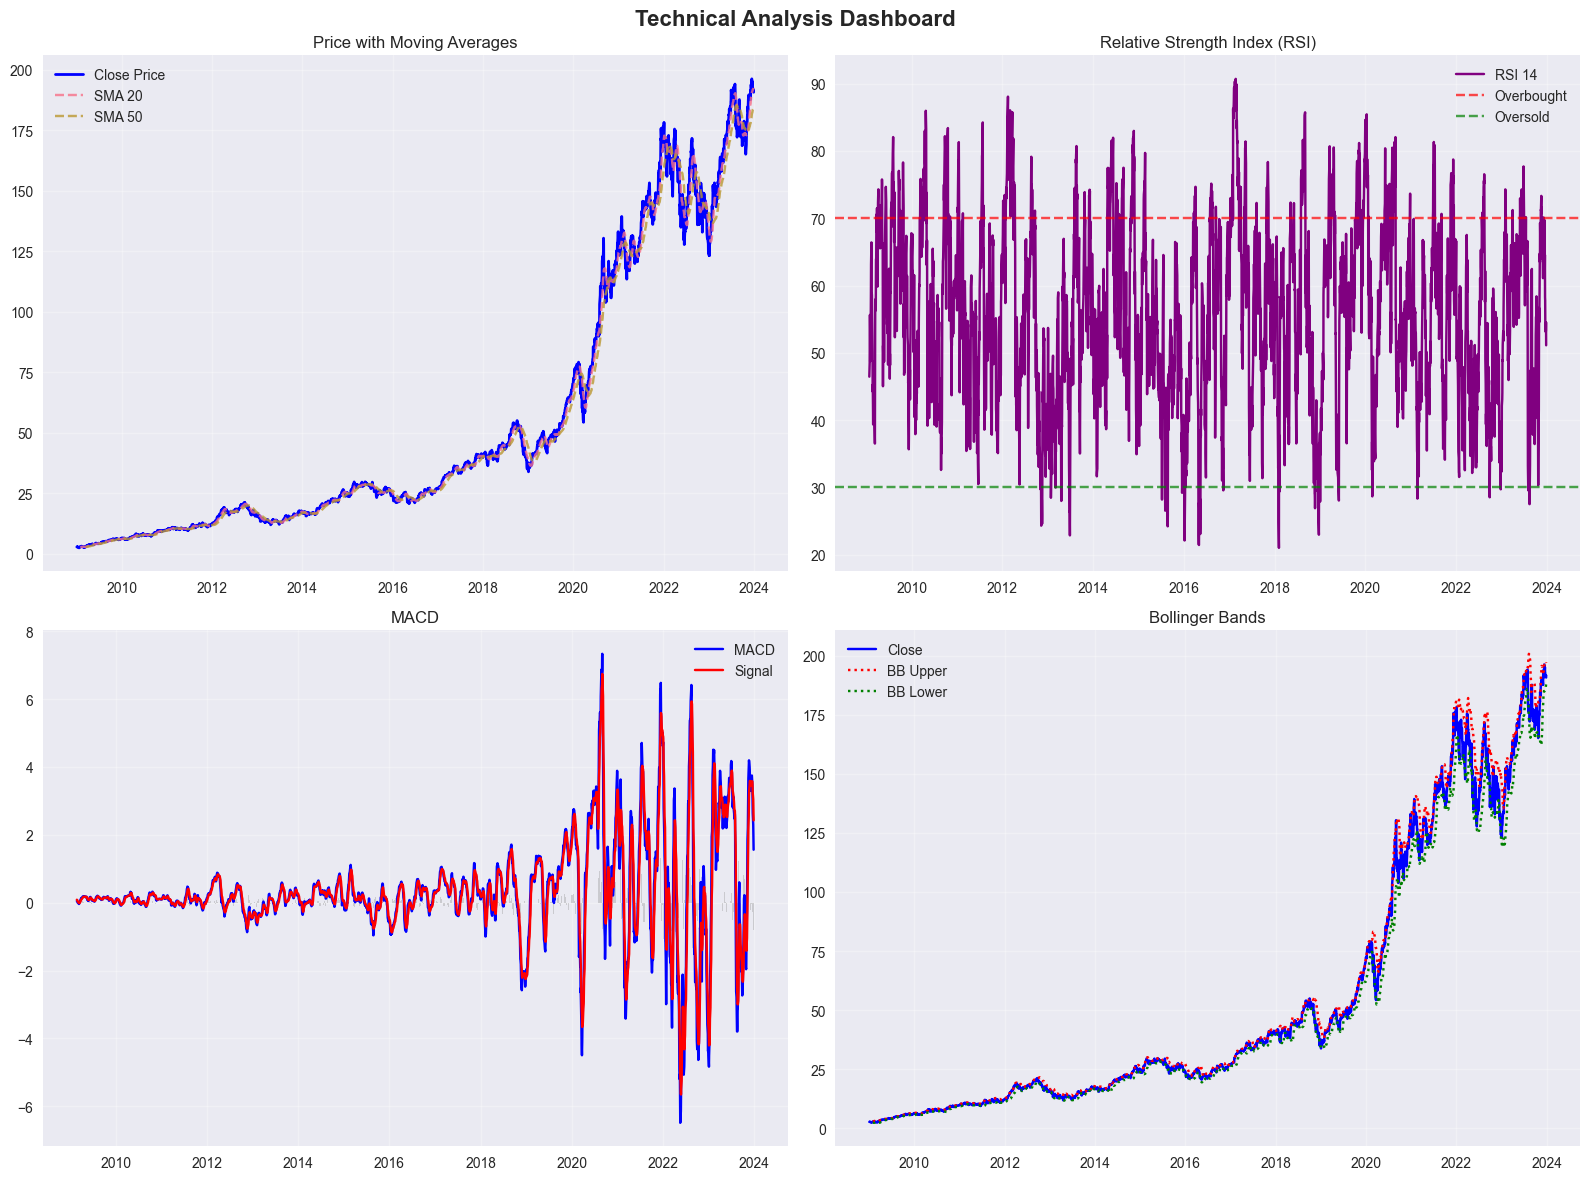

In [9]:
# Cell 7: Comprehensive Visualization - Price & Indicators
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Technical Analysis Dashboard', fontsize=16, fontweight='bold')

# Price with Moving Averages
axes[0, 0].plot(analyzed_data.index, analyzed_data['Close'], label='Close Price', linewidth=2, color='blue')
axes[0, 0].plot(analyzed_data.index, analyzed_data['SMA_20'], label='SMA 20', linestyle='--', alpha=0.8)
axes[0, 0].plot(analyzed_data.index, analyzed_data['SMA_50'], label='SMA 50', linestyle='--', alpha=0.8)
axes[0, 0].set_title('Price with Moving Averages')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# RSI
axes[0, 1].plot(analyzed_data.index, analyzed_data['RSI_14'], label='RSI 14', color='purple')
axes[0, 1].axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought')
axes[0, 1].axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold')
axes[0, 1].set_title('Relative Strength Index (RSI)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# MACD
axes[1, 0].plot(analyzed_data.index, analyzed_data['MACD'], label='MACD', color='blue')
axes[1, 0].plot(analyzed_data.index, analyzed_data['MACD_Signal'], label='Signal', color='red')
axes[1, 0].bar(analyzed_data.index, analyzed_data['MACD_Histogram'], alpha=0.3, color='gray')
axes[1, 0].set_title('MACD')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bollinger Bands
axes[1, 1].plot(analyzed_data.index, analyzed_data['Close'], label='Close', color='blue')
axes[1, 1].plot(analyzed_data.index, analyzed_data['BB_Upper'], label='BB Upper', linestyle=':', color='red')
axes[1, 1].plot(analyzed_data.index, analyzed_data['BB_Lower'], label='BB Lower', linestyle=':', color='green')
axes[1, 1].fill_between(analyzed_data.index, analyzed_data['BB_Upper'], analyzed_data['BB_Lower'], alpha=0.1)
axes[1, 1].set_title('Bollinger Bands')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

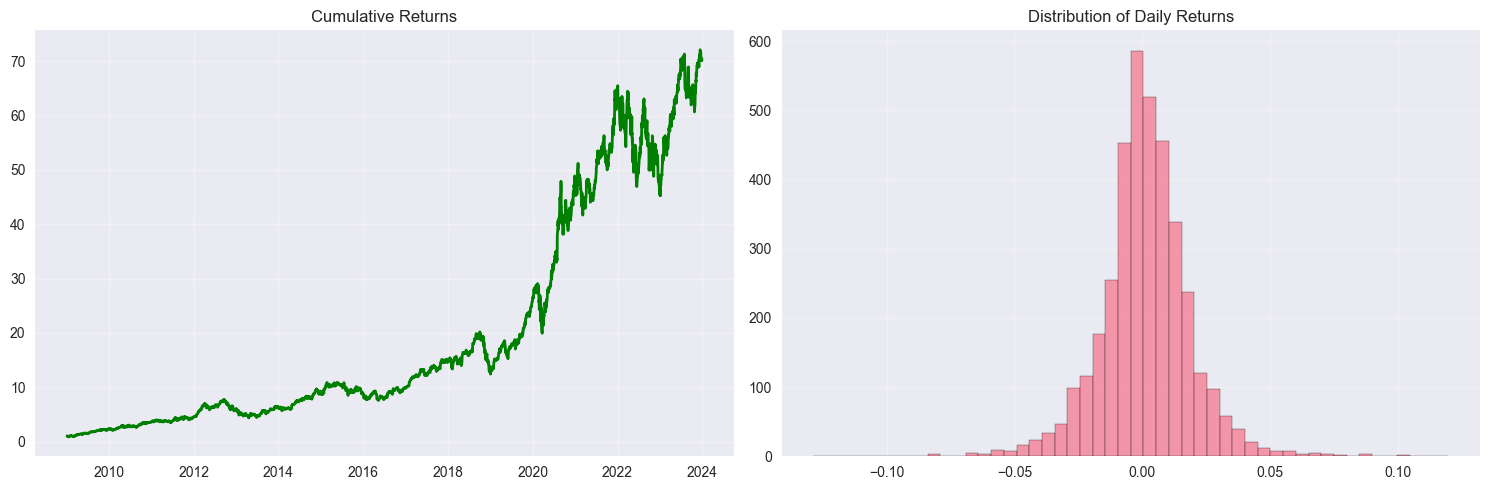

In [10]:
# Cell 8: Additional Visualizations
# Returns Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Cumulative Returns
axes[0].plot(analyzed_data.index, analyzed_data['Cumulative_Return'], color='green', linewidth=2)
axes[0].set_title('Cumulative Returns')
axes[0].grid(True, alpha=0.3)

# Daily Returns Distribution
axes[1].hist(analyzed_data['Daily_Return'].dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Daily Returns')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

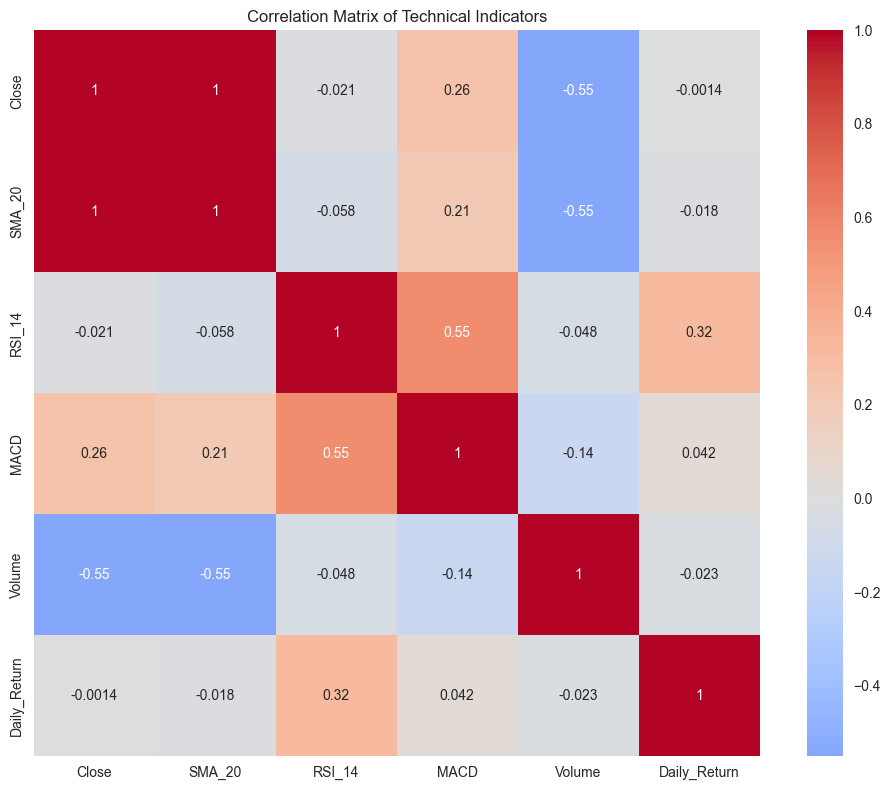

In [11]:
# Cell 9: Correlation Heatmap
import seaborn as sns

# Select key indicators for correlation
indicators = ['Close', 'SMA_20', 'RSI_14', 'MACD', 'Volume', 'Daily_Return']
corr_data = analyzed_data[indicators].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Technical Indicators')
plt.tight_layout()
plt.show()

In [12]:
# Cell 10: Generate Analysis Report
def generate_analysis_report(df):
    """Generate comprehensive analysis report"""
    
    print("="*50)
    print("📈 COMPREHENSIVE STOCK ANALYSIS REPORT")
    print("="*50)
    
    # Basic Info
    print(f"\n📊 BASIC INFORMATION:")
    print(f"   • Analysis Period: {df.index.min().date()} to {df.index.max().date()}")
    print(f"   • Trading Days: {len(df)}")
    print(f"   • Final Price: ${df['Close'].iloc[-1]:.2f}")
    
    # Returns Analysis
    total_return = df['Cumulative_Return'].iloc[-1] - 1
    print(f"\n💰 RETURNS ANALYSIS:")
    print(f"   • Total Return: {total_return:.2%}")
    print(f"   • Average Daily Return: {df['Daily_Return'].mean():.4%}")
    print(f"   • Volatility (20D): {df['Volatility_20D'].iloc[-1]:.4%}")
    
    # Current Signals
    current_rsi = df['RSI_14'].iloc[-1]
    rsi_status = "🔴 Overbought" if current_rsi > 70 else "🟢 Oversold" if current_rsi < 30 else "⚪ Neutral"
    
    ma_signal = "🟢 Bullish" if df['SMA_20'].iloc[-1] > df['SMA_50'].iloc[-1] else "🔴 Bearish"
    macd_signal = "🟢 Bullish" if df['MACD'].iloc[-1] > df['MACD_Signal'].iloc[-1] else "🔴 Bearish"
    
    print(f"\n🎯 CURRENT SIGNALS:")
    print(f"   • RSI ({current_rsi:.1f}): {rsi_status}")
    print(f"   • MA Crossover: {ma_signal}")
    print(f"   • MACD: {macd_signal}")
    print(f"   • Combined Signal: {df['Combined_Signal'].iloc[-1]}")
    
    print(f"\n📋 RECOMMENDATION:")
    signal = df['Combined_Signal'].iloc[-1]
    if signal > 1:
        print("   🟢 STRONG BUY SIGNAL")
    elif signal > 0:
        print("   ⚪ WEAK BUY / HOLD")
    elif signal < -1:
        print("   🔴 STRONG SELL SIGNAL")
    else:
        print("   ⚪ WEAK SELL / HOLD")

generate_analysis_report(analyzed_data)

📈 COMPREHENSIVE STOCK ANALYSIS REPORT

📊 BASIC INFORMATION:
   • Analysis Period: 2009-01-02 to 2023-12-29
   • Trading Days: 3774
   • Final Price: $190.73

💰 RETURNS ANALYSIS:
   • Total Return: 6907.74%
   • Average Daily Return: 0.1289%
   • Volatility (20D): 0.9078%

🎯 CURRENT SIGNALS:
   • RSI (51.1): ⚪ Neutral
   • MA Crossover: 🟢 Bullish
   • MACD: 🔴 Bearish
   • Combined Signal: 0

📋 RECOMMENDATION:
   ⚪ WEAK SELL / HOLD


In [13]:
# Cell 11: Save Processed Data
# Save the analyzed data to CSV
analyzed_data.to_csv('processed_stock_analysis.csv')
print("✅ Analysis completed and saved to 'processed_stock_analysis.csv'")

# Display final dataset info
print(f"\n📁 Final dataset shape: {analyzed_data.shape}")
print(f"📊 Columns calculated: {len(analyzed_data.columns)}")
print("🎯 Analysis complete! Check the visualizations and report above.")

✅ Analysis completed and saved to 'processed_stock_analysis.csv'

📁 Final dataset shape: (3774, 30)
📊 Columns calculated: 30
🎯 Analysis complete! Check the visualizations and report above.
